## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn.preprocessing
from scipy import stats

## Loading the dataset

In [2]:
pdf=pd.read_csv("previous_application.csv")
pdf.columns = pdf.columns.map(lambda x: x.lower())
pdf.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')

In [3]:
with pd.option_context("display.max_columns", None):
    display(pdf.head())

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding Data 

In [4]:
pdf.shape

(1670214, 37)

-  Data has `1670214 rows` and `37 columns`

In [5]:
customer=pdf.sk_id_curr.value_counts().index
print(pdf.sk_id_curr.value_counts())
print('No. of Customers:',len(pdf.sk_id_curr.value_counts()))

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: sk_id_curr, Length: 338857, dtype: int64
No. of Customers: 338857


- There are customers with multiple loan applications in the dataset.
- No. of Customers: `338857` (No of unique sk_current ids)

In [6]:
num=list(pdf._get_numeric_data().columns)
print("Numerical Variables:   ",len(num))

ct=set(pdf.columns)-set(num)
print("Categorical Variables: ",len(ct))

Numerical Variables:    21
Categorical Variables:  16


In [7]:
num , ct

(['sk_id_prev',
  'sk_id_curr',
  'amt_annuity',
  'amt_application',
  'amt_credit',
  'amt_down_payment',
  'amt_goods_price',
  'hour_appr_process_start',
  'nflag_last_appl_in_day',
  'rate_down_payment',
  'rate_interest_primary',
  'rate_interest_privileged',
  'days_decision',
  'sellerplace_area',
  'cnt_payment',
  'days_first_drawing',
  'days_first_due',
  'days_last_due_1st_version',
  'days_last_due',
  'days_termination',
  'nflag_insured_on_approval'],
 {'channel_type',
  'code_reject_reason',
  'flag_last_appl_per_contract',
  'name_cash_loan_purpose',
  'name_client_type',
  'name_contract_status',
  'name_contract_type',
  'name_goods_category',
  'name_payment_type',
  'name_portfolio',
  'name_product_type',
  'name_seller_industry',
  'name_type_suite',
  'name_yield_group',
  'product_combination',
  'weekday_appr_process_start'})

In [8]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_down_payment             774370 non-null   float64
 7   amt_goods_price              1284699 non-null  float64
 8   weekday_appr_process_start   1670214 non-null  object 
 9   hour_appr_process_start      1670214 non-null  int64  
 10  flag_last_appl_per_contract  1670214 non-null  object 
 11  nflag_last_appl_in_day       1670214 non-null  int64  
 12  rate_down_payment            774370 non-nu

#### Stastical Analysis 

In [9]:
round(pdf.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
sk_id_prev,1670214.0,1923089.135,532597.959,1000001.000,1461857.250,1923110.500,2384279.750,2845382.000
sk_id_curr,1670214.0,278357.174,102814.824,100001.000,189329.000,278714.500,367514.000,456255.000
amt_annuity,1297979.0,15955.121,14782.137,0.000,6321.780,11250.000,20658.420,418058.145
amt_application,1670214.0,175233.860,292779.762,0.000,18720.000,71046.000,180360.000,6905160.000
amt_credit,1670213.0,196114.021,318574.617,0.000,24160.500,80541.000,216418.500,6905160.000
amt_down_payment,774370.0,6697.402,20921.495,-0.900,0.000,1638.000,7740.000,3060045.000
amt_goods_price,1284699.0,227847.279,315396.558,0.000,50841.000,112320.000,234000.000,6905160.000
hour_appr_process_start,1670214.0,12.484,3.334,0.000,10.000,12.000,15.000,23.000
nflag_last_appl_in_day,1670214.0,0.996,0.059,0.000,1.000,1.000,1.000,1.000
rate_down_payment,774370.0,0.080,0.108,-0.000,0.000,0.052,0.109,1.000


#### Uni-Variate Analysis

In [10]:
pdf.nflag_insured_on_approval.fillna('Missing',inplace = True)
pdf.nflag_insured_on_approval.replace({0:'No',1:'Yes'},inplace = True)

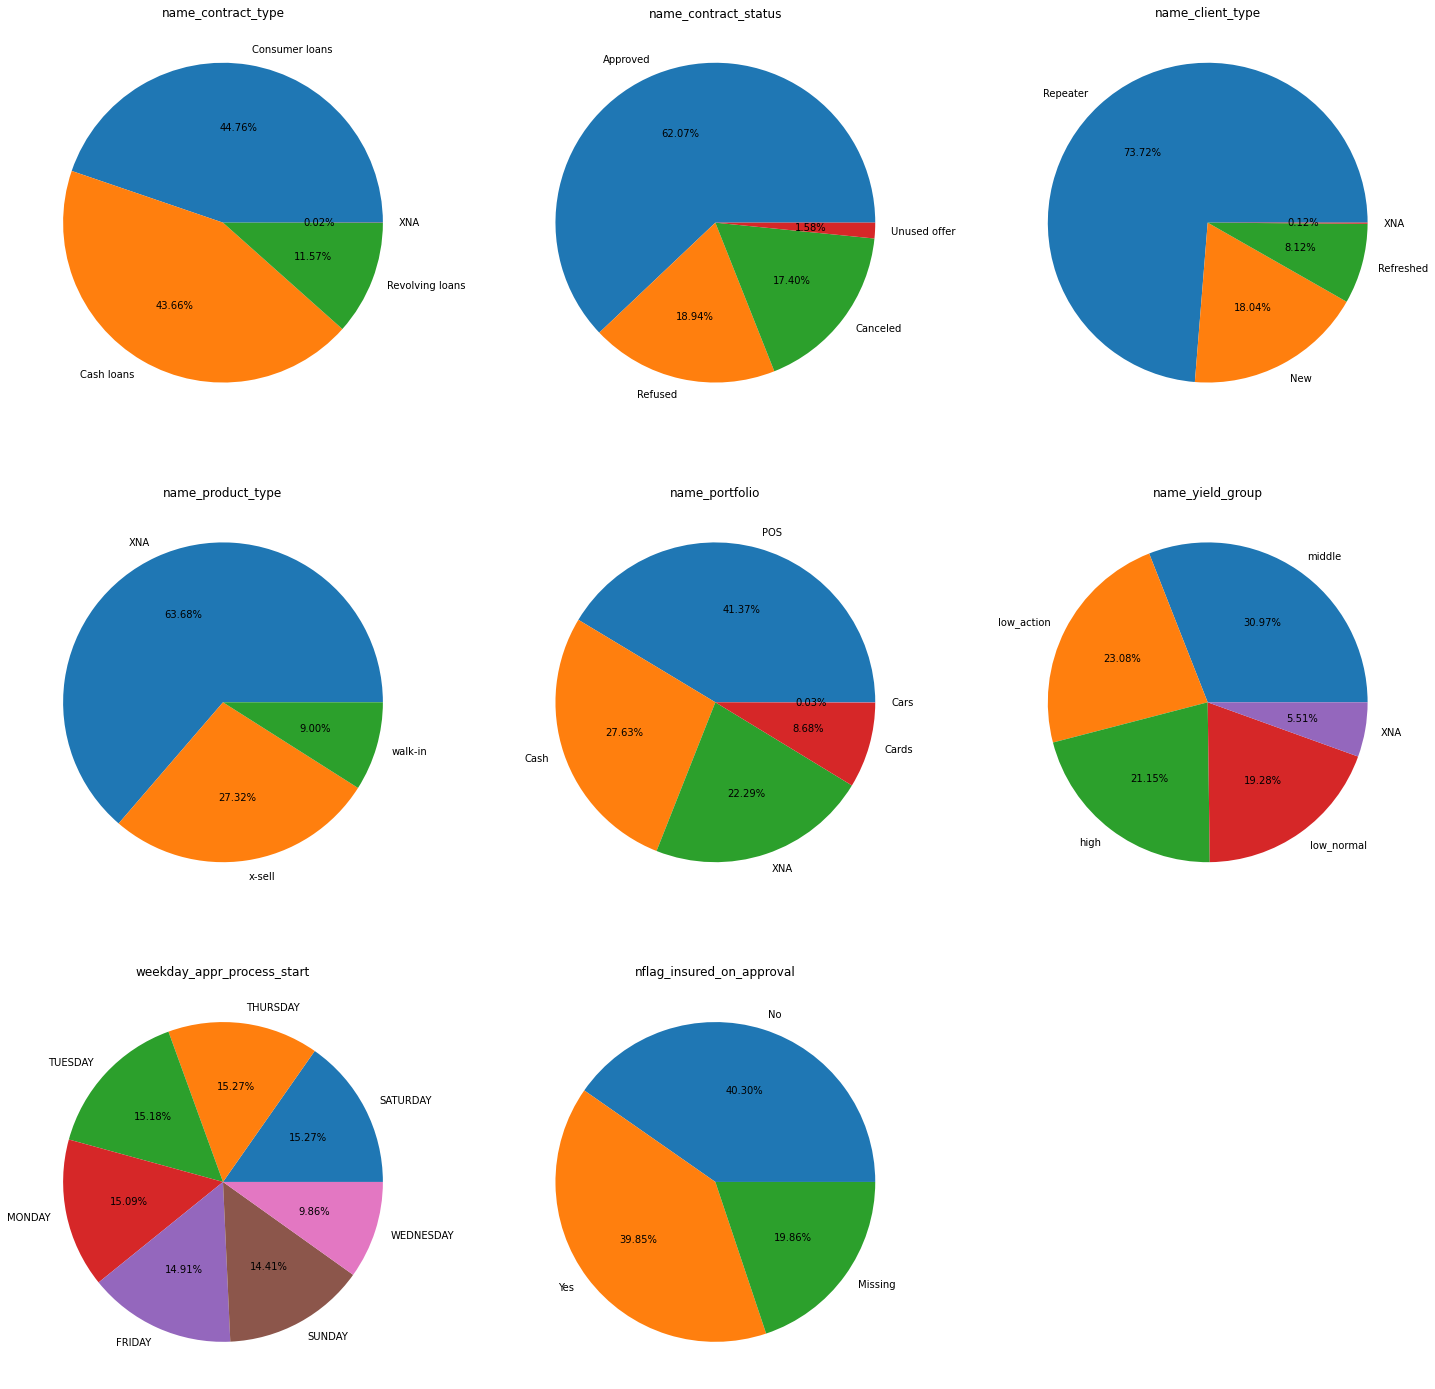

In [11]:
plt.figure(figsize=(25,25))
for n,i in enumerate(['name_contract_type','name_contract_status',
  'name_client_type','name_product_type','name_portfolio','name_yield_group',
  'weekday_appr_process_start','nflag_insured_on_approval']):
    plt.subplot(3,3,n+1)
    plt.title(i)
    label = pdf[i].unique()
    plt.pie(pdf[i].astype('str').value_counts(),labels = label,autopct = '%.02f%%');

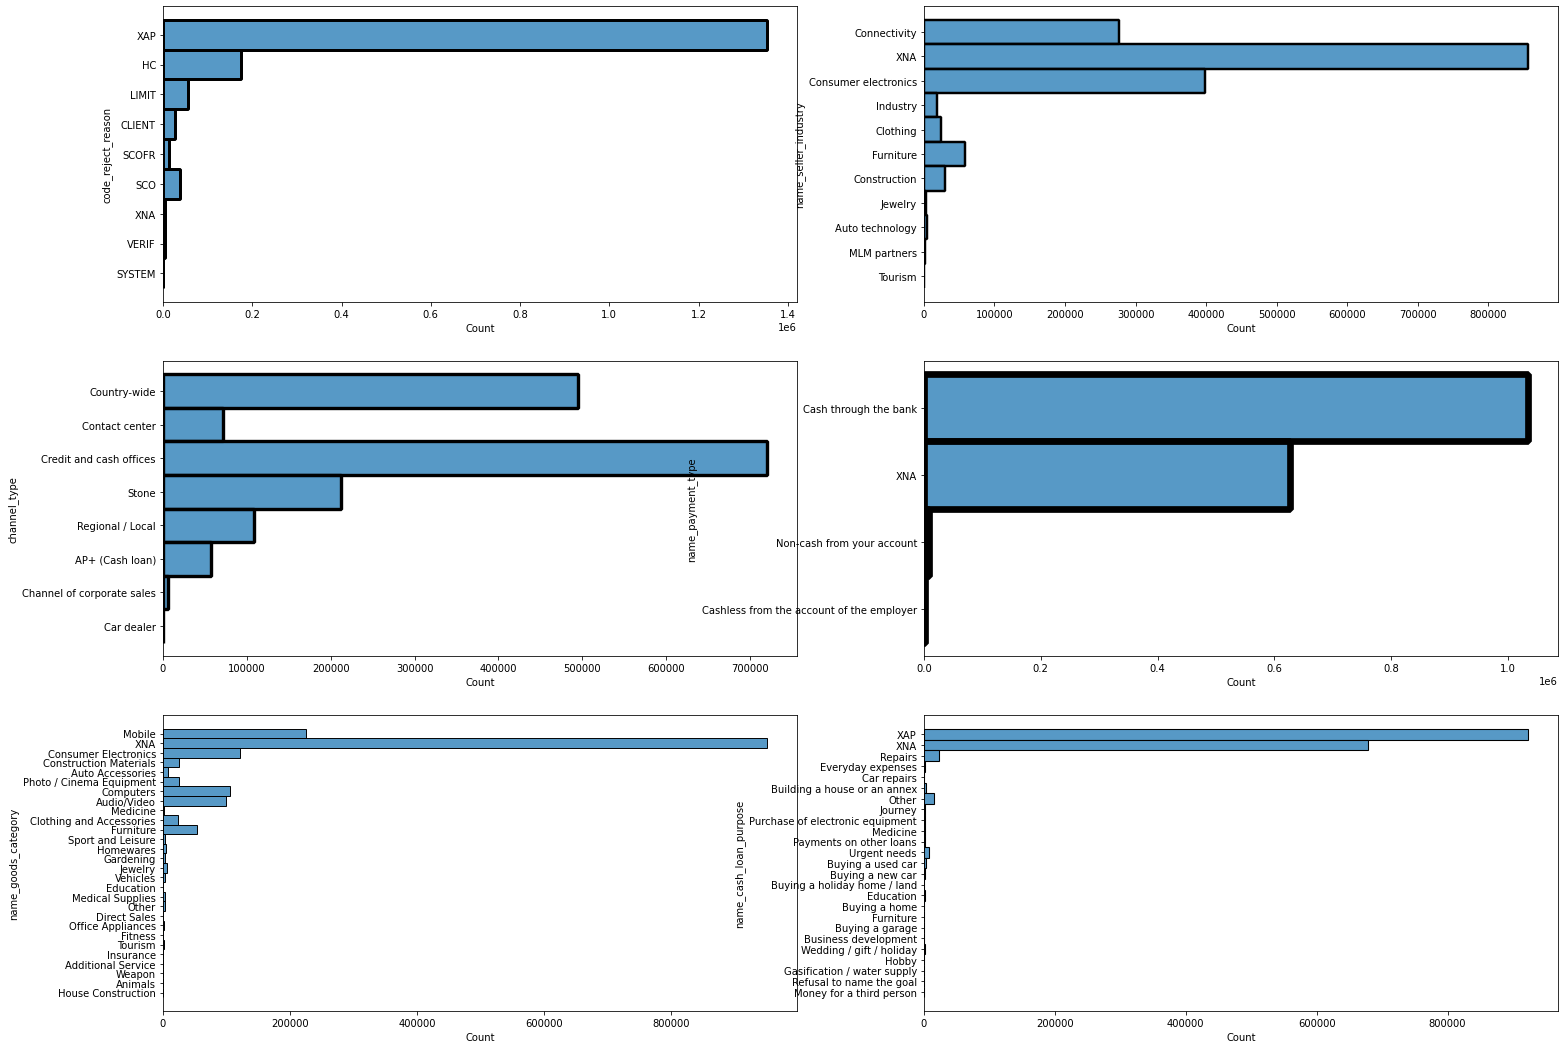

In [12]:
more = ['code_reject_reason','name_seller_industry','channel_type','name_payment_type',
        'name_goods_category','name_cash_loan_purpose'
       ]
plt.figure(figsize=(25,25))
for n,i in enumerate(more):
    plt.subplot(4,2,n+1)
    sn.histplot(y=pdf[i],)
#     print(pdf[i].value_counts().to_frame(),'\n')

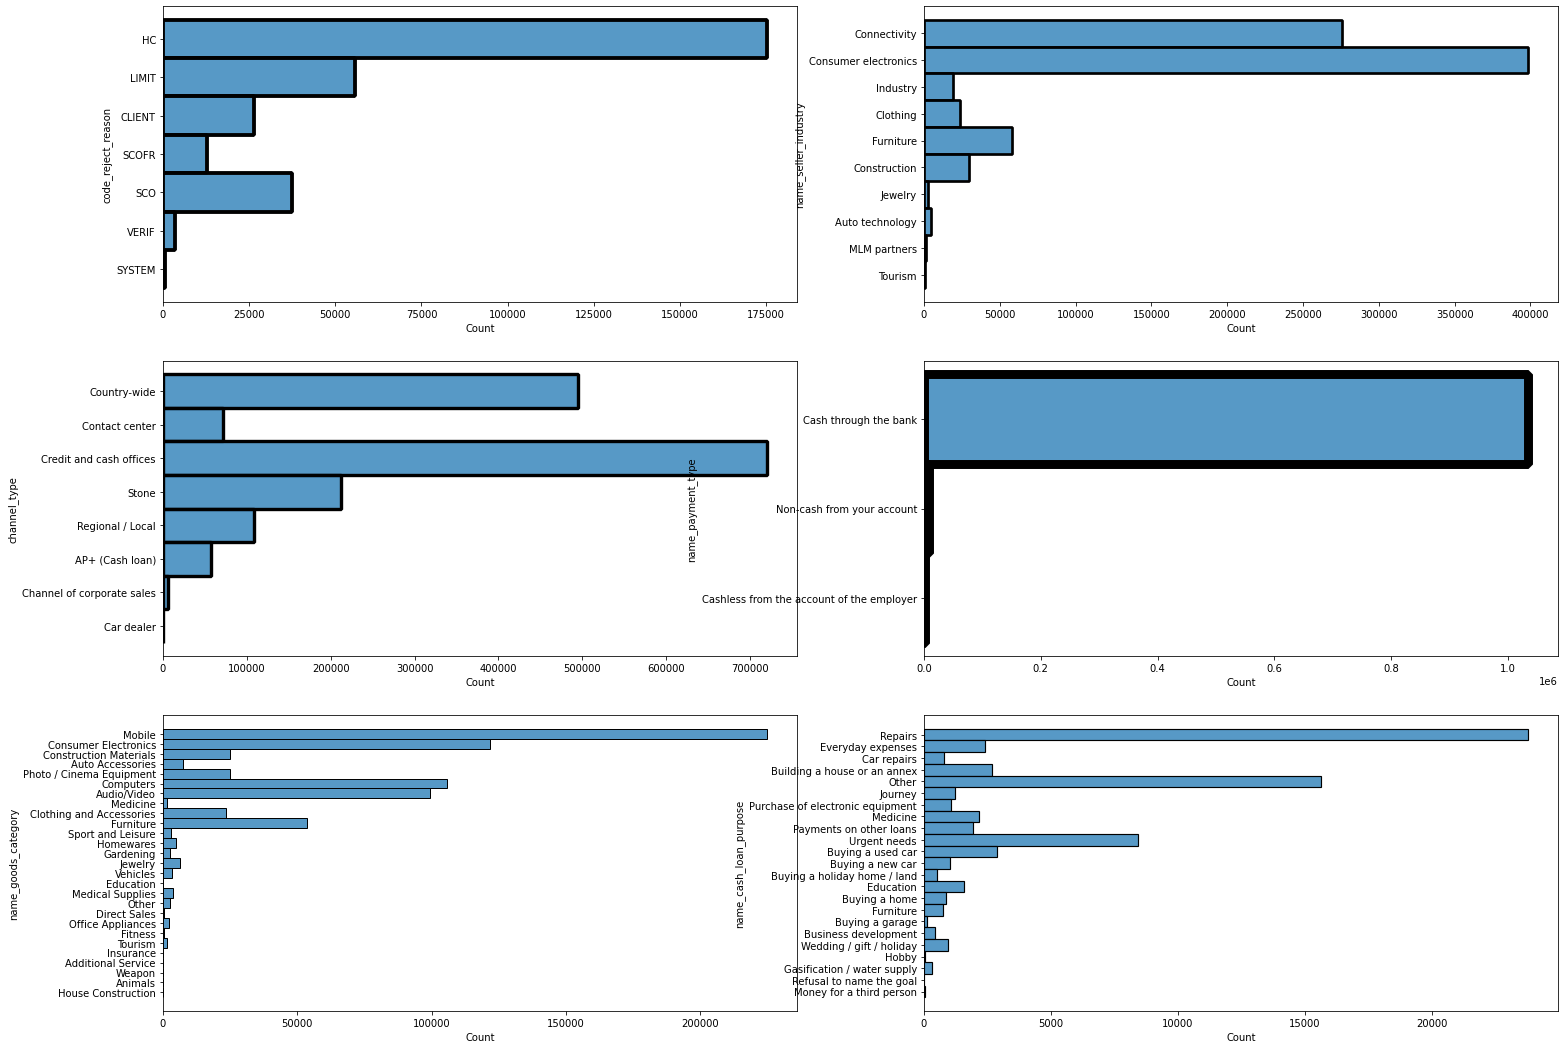

In [13]:
more = ['code_reject_reason','name_seller_industry','channel_type','name_payment_type',
        'name_goods_category','name_cash_loan_purpose'
       ]
plt.figure(figsize=(25,25))
for n,i in enumerate(more):
    plt.subplot(4,2,n+1)
    mask=(pdf[i]=='XNA') | (pdf[i]=='XAP')
    sn.histplot(y=pdf[i].drop(pdf[mask].index))

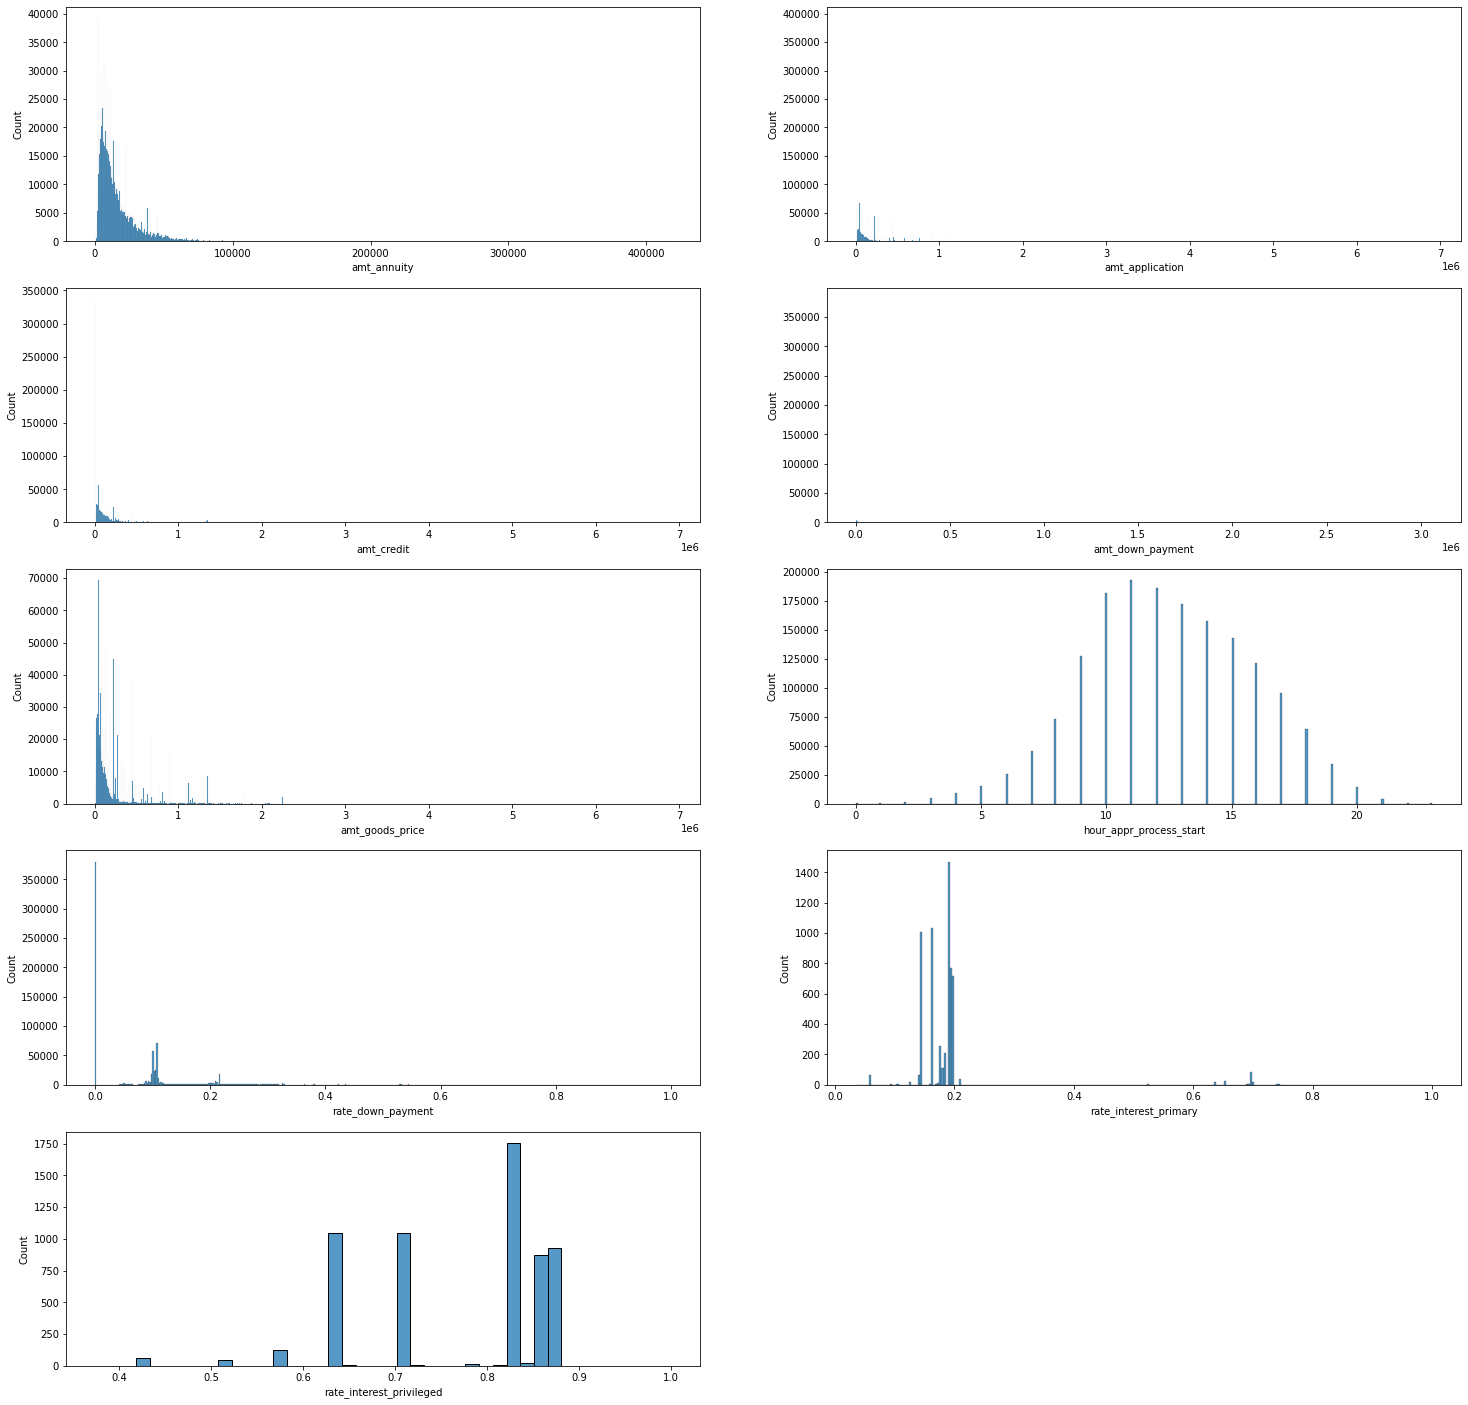

In [14]:
nmm=['amt_annuity',
  'amt_application',
  'amt_credit',
  'amt_down_payment',
  'amt_goods_price',
  'hour_appr_process_start',
  'rate_down_payment',
  'rate_interest_primary',
  'rate_interest_privileged']
plt.figure(figsize=(25,25))
for n,i in enumerate(nmm):
    plt.subplot(5,2,n+1)
    sn.histplot(data=pdf,x=pdf[i]);

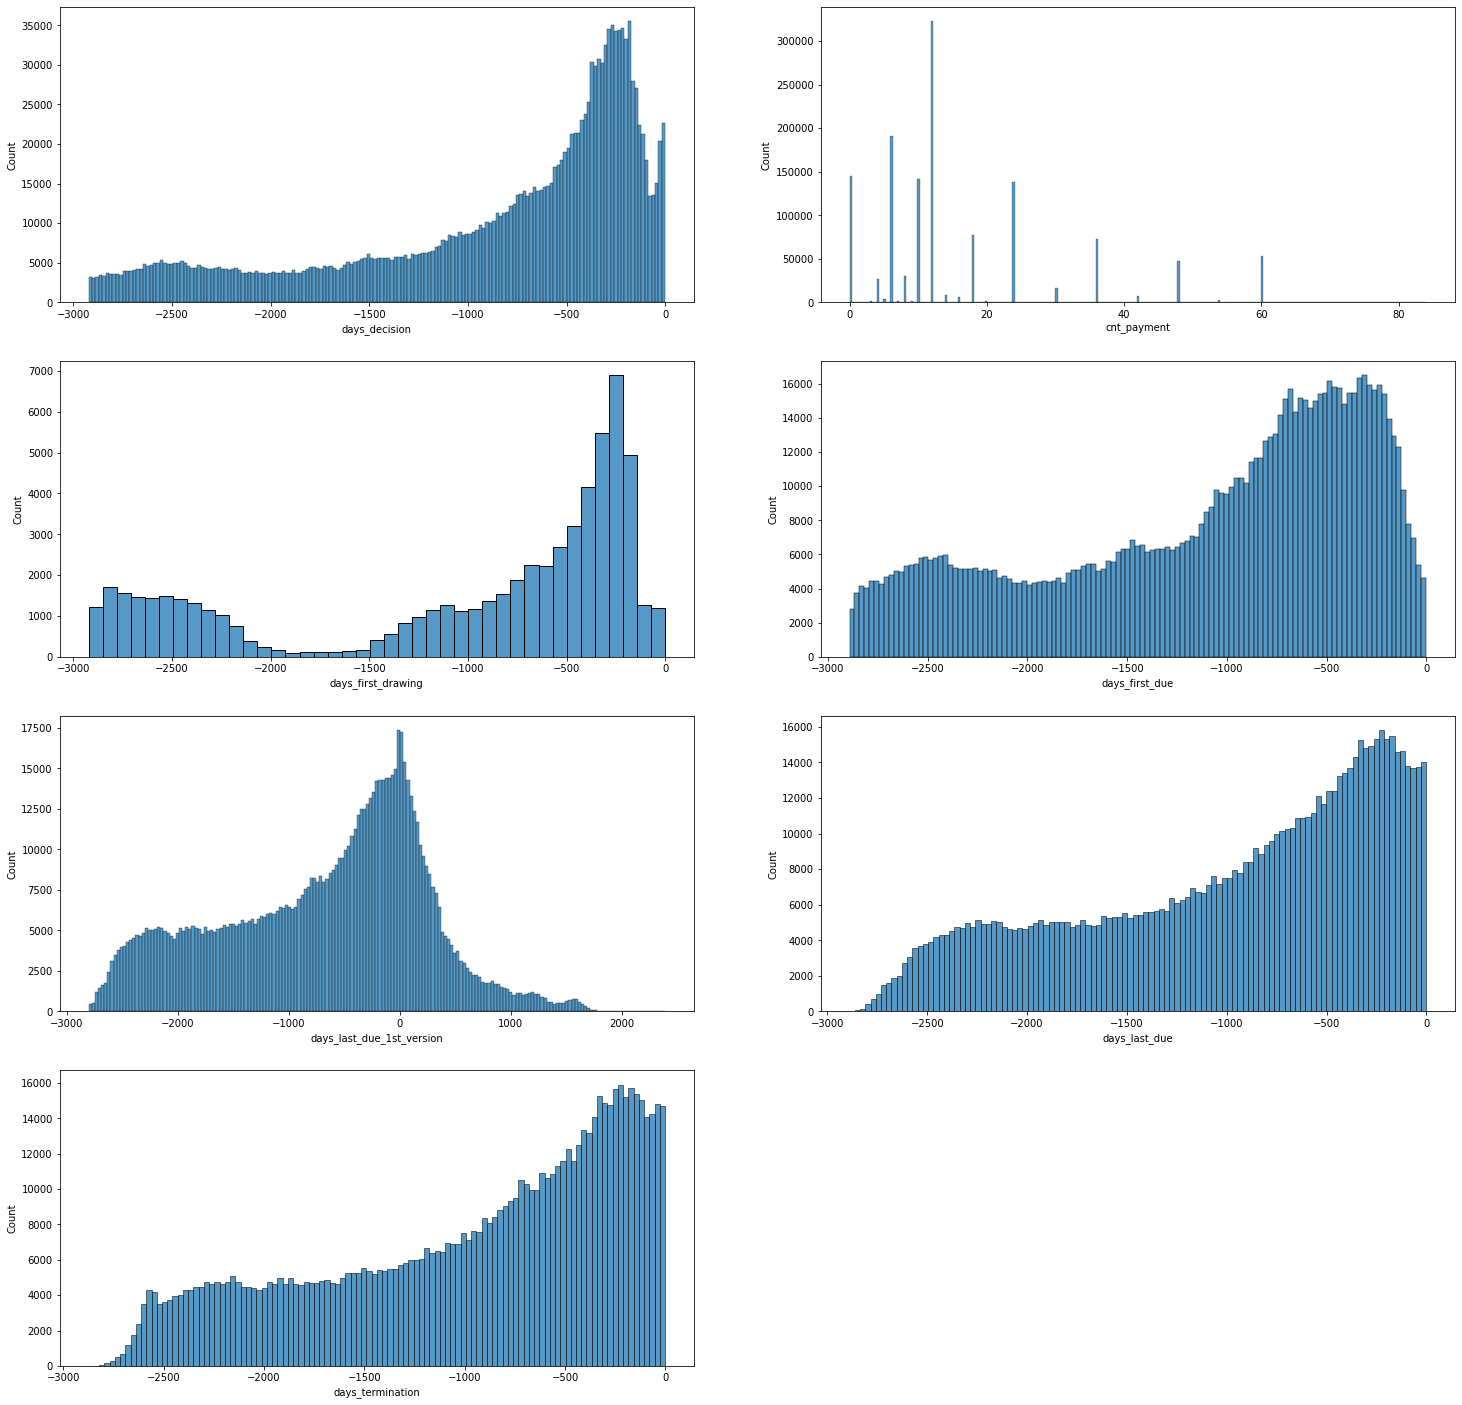

In [15]:
nmm=[  'days_decision',
  'cnt_payment',
  'days_first_drawing',
  'days_first_due',
  'days_last_due_1st_version',
  'days_last_due',
  'days_termination'
]
plt.figure(figsize=(25,25))
for n,i in enumerate(nmm):
    plt.subplot(4,2,n+1)
    sn.histplot(data=pdf,x=pdf[i].drop(pdf[pdf[i]==365243].index));

### Feature Engineering

In [16]:
# As we will only be working on accepting and rejecting loans
pdf=pdf[[x in ['Approved','Refused'] for x in pdf.name_contract_status]].copy()

In [17]:
# Dropping irrelevent missing values
pdf.drop(pdf.loc[pdf.name_contract_type=='XNA'].index,inplace=True)

# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
pdf['flag_last_appl_per_contract']= label_encoder.fit_transform(pdf['flag_last_appl_per_contract'])
pdf=pdf[pdf.flag_last_appl_per_contract==1]
pdf=pdf.drop(columns=['flag_last_appl_per_contract'])

pdf.name_contract_status= ['Unused' if x =='Unused offer' else x for x in pdf.name_contract_status]
pdf.loc[pdf.name_contract_status=='Approved','code_reject_reason']=pdf.loc[pdf.name_contract_status=='Approved','code_reject_reason'].apply(lambda x: 'XAP')
pdf.loc[pdf.name_contract_status=='Canceled','code_reject_reason']=pdf.loc[pdf.name_contract_status=='Canceled','code_reject_reason'].apply(lambda x: 'CANCELED')
pdf.loc[pdf.name_contract_status=='Unused','code_reject_reason']=pdf.loc[pdf.name_contract_status=='Unused','code_reject_reason'].apply(lambda x: 'UNUSED')
pdf.name_cash_loan_purpose.replace(to_replace=['Payments on other',
                                          'Money for a third','Refusal to name t',
                                          'Other','Gasification / wa'], 
                              value='Others',inplace=True)
pdf.name_goods_category.replace(to_replace=['Other','Additional Service',
                                       'Animals','Weapon',
                                       'Insurance','Direct Sales'], 
                           value='Others',inplace=True);
pdf.name_goods_category.replace(to_replace=['Medical Supplies'], 
                           value='Medicine',inplace=True);
pdf.name_goods_category.replace(to_replace=['Sport and Leisure','Fitness'], 
                           value='Sports and Fitness',inplace=True);
pdf.name_goods_category.replace(to_replace=['House Construction','Construction Materials'], 
                           value='Contruction',inplace=True);
pdf.name_goods_category.replace(to_replace=['Auto Accessories','Vehicles'], 
                           value='Automobile',inplace=True);
mask=(pdf.name_goods_category=='XNA') & (pdf.name_contract_type=='Cash loans')
pdf.loc[mask,'name_goods_category']='XAP'
mask=(pdf.name_payment_type=='XNA') & (pdf.name_contract_type=='Revolving loans')
pdf.loc[mask,'name_payment_type']='XAP'
mask=(pdf.name_portfolio=='XNA') & (pdf.name_contract_status=='Approved')
pdf.loc[mask,'name_portfolio'].value_counts()
mask=(pdf.name_portfolio=='XNA') & (pdf.name_contract_status=='Approved') & (pdf.name_portfolio=='Cash')
pdf.loc[mask,'name_portfolio']= 'Cash'
mask=(pdf.name_yield_group=='XNA') & (pdf.name_contract_type=='Revolving loans')
pdf.loc[mask,'name_yield_group']='XAP'
mask=(pdf.name_cash_loan_purpose=='XNA') & (pdf.name_contract_type=='Cash loans')
pdf.loc[mask,'name_cash_loan_purpose']='MISSING'

# dy columns with '365243'
pdf.replace(to_replace=365243,value=np.NaN,inplace=True)

pdf.drop(pdf[pdf.amt_credit.isna()].index,inplace=True)
pdf['amt_down_payment'].fillna(value=0,inplace=True)
pdf['rate_down_payment'].fillna(value=0,inplace=True)
pdf.loc[pdf.name_contract_type!='Revolving loans','amt_goods_price'].fillna(value=pdf.amt_application,inplace=True)
pdf.name_type_suite.fillna(pdf.name_type_suite.mode,inplace= True)
pdf.loc[pdf.name_contract_type=='Revolving loans','cnt_payment'].fillna(value=0,inplace=True)


In [18]:
pdf.duplicated().sum()

0

In [19]:
pdf.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,No
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,Yes
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,Yes
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,NaN,-482.0,-152.0,-182.0,-177.0,Yes
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,Missing


<AxesSubplot:xlabel='amt_credit', ylabel='amt_annuity'>

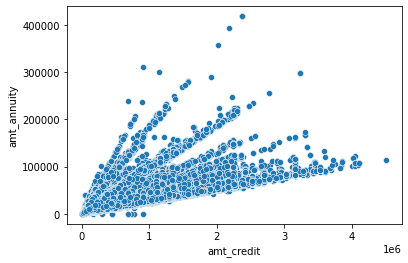

In [20]:
sn.scatterplot(data = pdf, y="amt_annuity" , x ="amt_credit" )

### Analyzing Diff. types of Loans

#### TYPES OF LOANS
Since there are multiple types of loans which will be judged on different parameters with different thresholds, we will be building two models for
- Revolving loans
- Installment loans

#### REVOLVING LOANS

In [21]:
rpdf=pdf[pdf.name_contract_type=='Revolving loans'].copy()
rpdf.drop(columns=['name_contract_type'],inplace=True)
rpdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138835 entries, 17 to 1670193
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sk_id_prev                  138835 non-null  int64  
 1   sk_id_curr                  138835 non-null  float64
 2   amt_annuity                 136043 non-null  float64
 3   amt_application             138835 non-null  float64
 4   amt_credit                  138835 non-null  float64
 5   amt_down_payment            138835 non-null  float64
 6   amt_goods_price             89407 non-null   float64
 7   weekday_appr_process_start  138835 non-null  object 
 8   hour_appr_process_start     138835 non-null  int64  
 9   nflag_last_appl_in_day      138835 non-null  int64  
 10  rate_down_payment           138835 non-null  float64
 11  rate_interest_primary       0 non-null       float64
 12  rate_interest_privileged    0 non-null       float64
 13  name_cash_lo

In [22]:
# Dropping variables insignificant for our current analysis
rpdf.drop(columns = ['amt_annuity','amt_down_payment','rate_down_payment','rate_interest_primary','rate_interest_privileged','nflag_insured_on_approval','days_first_drawing','days_first_due','days_last_due','days_termination','days_last_due_1st_version'] , inplace = True)

In [23]:
rpdf.head()

,sk_id_prev,sk_id_curr,amt_application,amt_credit,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,nflag_last_appl_in_day,name_cash_loan_purpose,name_contract_status,...,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination
17,1285768,142748.0,180000.0,180000.0,180000.0,FRIDAY,13,1,XAP,Approved,...,Repeater,XNA,Cards,x-sell,AP+ (Cash loan),6,XNA,0.0,XAP,Card X-Sell
34,1629736,255331.0,202500.0,202500.0,202500.0,SATURDAY,14,1,XAP,Approved,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XAP,Card X-Sell
45,2621158,281470.0,292500.0,292500.0,292500.0,FRIDAY,17,1,XAP,Refused,...,Repeater,XNA,Cards,x-sell,Country-wide,182,Connectivity,0.0,XAP,Card X-Sell
49,1371540,200721.0,225000.0,225000.0,225000.0,FRIDAY,15,1,XAP,Approved,...,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XAP,Card Street
80,2012211,282125.0,0.0,675000.0,NaN,FRIDAY,17,1,XAP,Refused,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XAP,Card X-Sell


In [24]:
# Looking for Missing Values
na_variables = [ var for var in rpdf.columns if rpdf[var].isnull().mean() > 0 ]
na_variables

['amt_goods_price', 'cnt_payment']

In [25]:
data_na = (rpdf[na_variables].isnull().sum())
data_na.sort_values()

cnt_payment         2791
amt_goods_price    49428
dtype: int64

In [26]:
data_na = (rpdf[na_variables].isnull().mean())*100
data_na.sort_values()

cnt_payment         2.010300
amt_goods_price    35.601974
dtype: float64

In [27]:
rpdf['cnt_payment'].value_counts()

0.0    136044
Name: cnt_payment, dtype: int64

In [28]:
rpdf['cnt_payment'].fillna(0,inplace = True)

<AxesSubplot:>

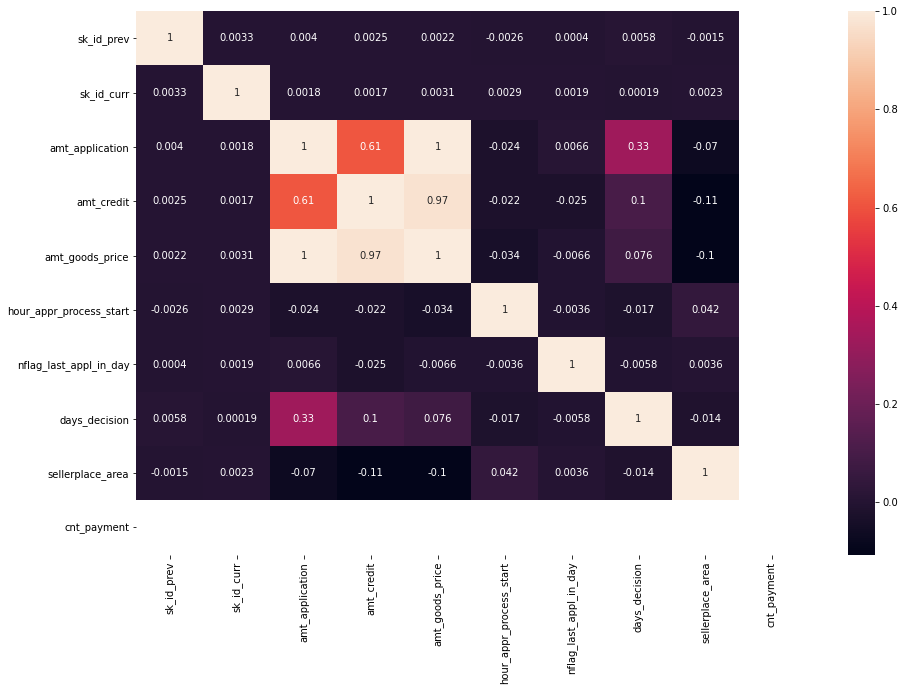

In [29]:
plt.figure(figsize=(15,10))
sn.heatmap(rpdf.corr(),annot = True)

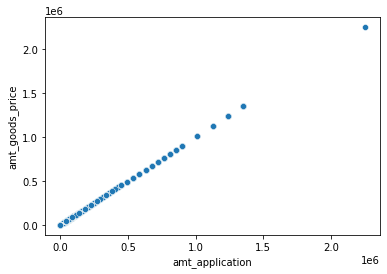

In [30]:
sn.scatterplot(data = rpdf, y="amt_goods_price" , x ="amt_application" );

In [31]:
# correlation is 1 between them
rpdf['amt_goods_price'].fillna(rpdf['amt_application'],inplace = True)

In [32]:
rpdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138835 entries, 17 to 1670193
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sk_id_prev                  138835 non-null  int64  
 1   sk_id_curr                  138835 non-null  float64
 2   amt_application             138835 non-null  float64
 3   amt_credit                  138835 non-null  float64
 4   amt_goods_price             138835 non-null  float64
 5   weekday_appr_process_start  138835 non-null  object 
 6   hour_appr_process_start     138835 non-null  int64  
 7   nflag_last_appl_in_day      138835 non-null  int64  
 8   name_cash_loan_purpose      138835 non-null  object 
 9   name_contract_status        138835 non-null  object 
 10  days_decision               138835 non-null  int64  
 11  name_payment_type           138835 non-null  object 
 12  code_reject_reason          138835 non-null  object 
 13  name_type_su

In [33]:
rpdf['target']=[1 if x =='Approved' else 0 for x in rpdf.name_contract_status]

rpdf.drop(columns = ['name_contract_status'],inplace = True)

rpdf.head()

,sk_id_prev,sk_id_curr,amt_application,amt_credit,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,nflag_last_appl_in_day,name_cash_loan_purpose,days_decision,...,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,target
17,1285768,142748.0,180000.0,180000.0,180000.0,FRIDAY,13,1,XAP,-336,...,XNA,Cards,x-sell,AP+ (Cash loan),6,XNA,0.0,XAP,Card X-Sell,1
34,1629736,255331.0,202500.0,202500.0,202500.0,SATURDAY,14,1,XAP,-284,...,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XAP,Card X-Sell,1
45,2621158,281470.0,292500.0,292500.0,292500.0,FRIDAY,17,1,XAP,-231,...,XNA,Cards,x-sell,Country-wide,182,Connectivity,0.0,XAP,Card X-Sell,0
49,1371540,200721.0,225000.0,225000.0,225000.0,FRIDAY,15,1,XAP,-847,...,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XAP,Card Street,1
80,2012211,282125.0,0.0,675000.0,0.0,FRIDAY,17,1,XAP,-568,...,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XAP,Card X-Sell,0


In [34]:
rpdf['target'].value_counts(), rpdf['target'].value_counts(normalize = True)*100

(1    97770
 0    41065
 Name: target, dtype: int64,
 1    70.421724
 0    29.578276
 Name: target, dtype: float64)

In [35]:
rpdf.duplicated().sum()

0

In [36]:
# dropping insignificant variables
rpdf=rpdf.drop(columns = ['sk_id_prev','sk_id_curr','code_reject_reason','name_cash_loan_purpose',
                     'name_type_suite','product_combination','name_portfolio','name_yield_group'
                    ''])

In [37]:
num=list(rpdf._get_numeric_data().columns)
print("Numerical Variables:   ",len(num))

ct=set(rpdf.columns)-set(num)
print("Categorical Variables: ",len(ct))

Numerical Variables:    9
Categorical Variables:  7


In [38]:
num , ct

(['amt_application',
  'amt_credit',
  'amt_goods_price',
  'hour_appr_process_start',
  'nflag_last_appl_in_day',
  'days_decision',
  'sellerplace_area',
  'cnt_payment',
  'target'],
 {'channel_type',
  'name_client_type',
  'name_goods_category',
  'name_payment_type',
  'name_product_type',
  'name_seller_industry',
  'weekday_appr_process_start'})

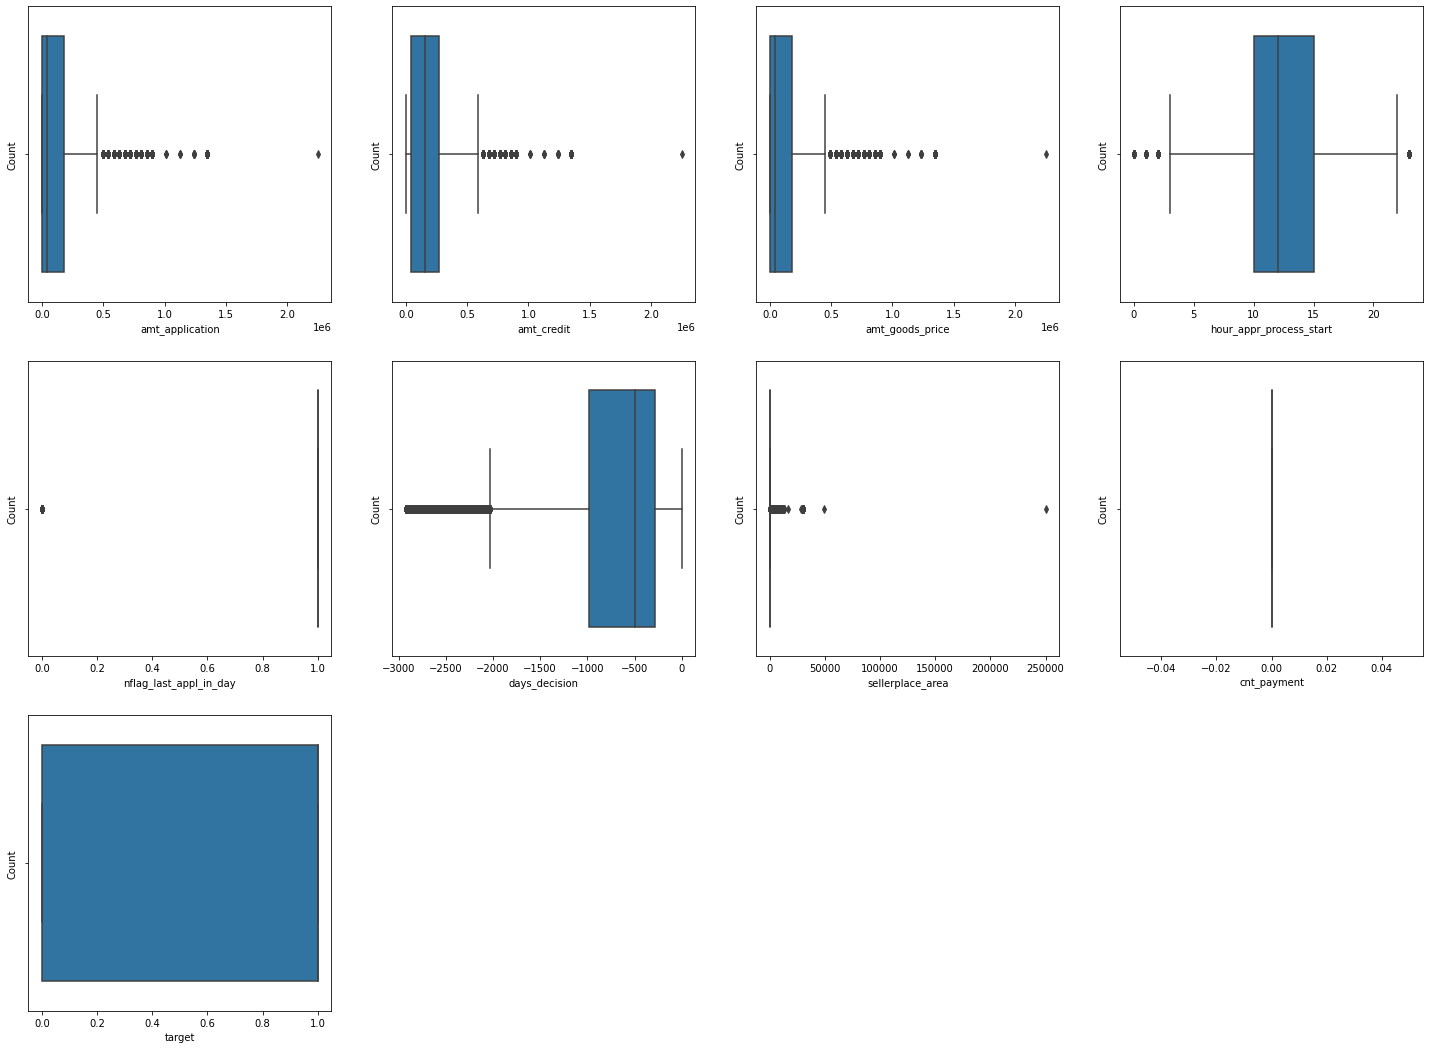

In [39]:
plt.figure(figsize=(25,25))
for i,var in enumerate(num):
    plt.subplot(4,4,i+1)
    sn.boxplot(x=rpdf[var],data=rpdf)
    plt.xlabel(var)
    plt.ylabel("Count")

In [40]:
# Encoding Categorical Columns

rdf=pd.get_dummies(rpdf, columns=['channel_type',
  'name_client_type',
  'name_payment_type',
  'name_product_type',
  'name_seller_industry',
  'weekday_appr_process_start'], prefix='r')

rdf=pd.get_dummies(rdf, columns=['name_goods_category'], prefix='r')


### Model Building for Revolving Loans

In [41]:
X, y = rdf.drop('target',axis=1),rdf['target']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,stratify=y,random_state=42)

rf=RandomForestClassifier()

adaboost=AdaBoostClassifier()

xg = XGBClassifier()

#### Random Forest

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
# y = rf.predict(X_train)
y_pred = rf.predict(X_val)

In [45]:
from sklearn import metrics
print("Test Data Accuracy:",metrics.accuracy_score(y_val, y_pred))

Test Data Accuracy: 0.7618035797889581


In [46]:
metrics.precision_score(y_val,y_pred) , metrics.recall_score(y_val,y_pred) , metrics.f1_score(y_val,y_pred)

(0.809599004689444, 0.865244962667485, 0.8364975773756552)

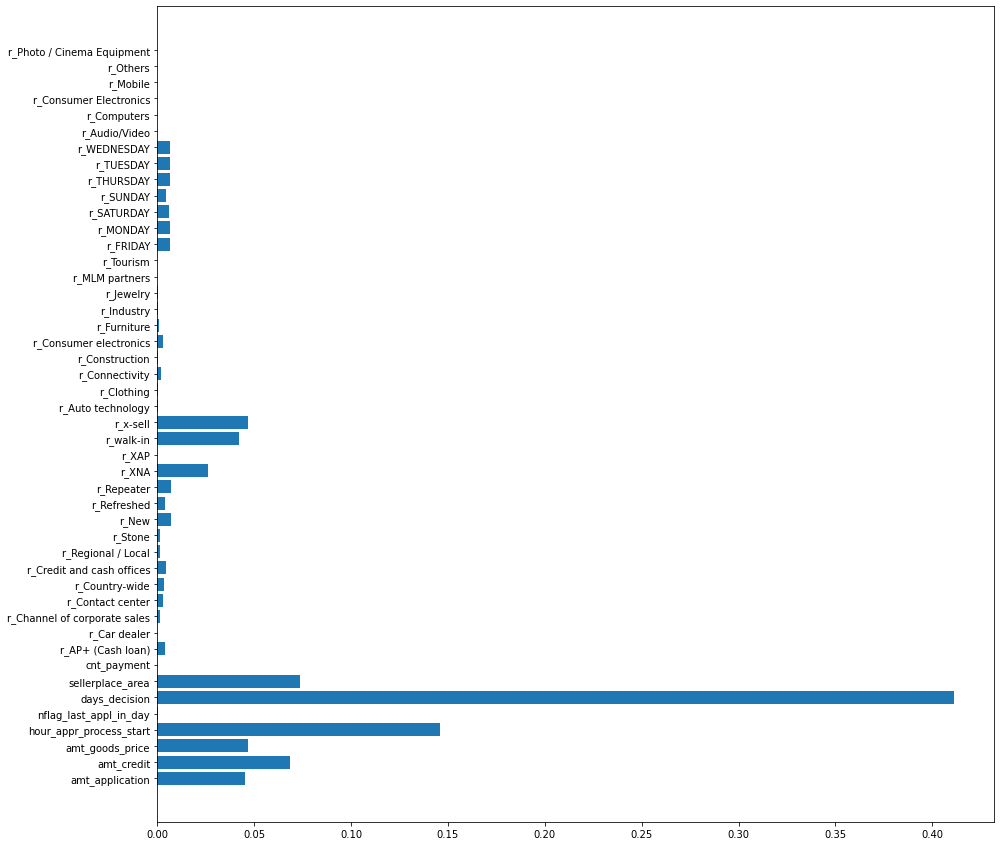

In [47]:
rf.feature_importances_
plt.figure(figsize=(15,15))
plt.barh(X.columns, rf.feature_importances_);

#### Adaboost

In [48]:
adaboost.fit(X_train,y_train)
# y = rf.predict(X_train)
y_pred = adaboost.predict(X_val)
metrics.accuracy_score(y_val, y_pred) 

0.7854287463535852

In [49]:
 metrics.precision_score(y_val,y_pred) , metrics.recall_score(y_val,y_pred) , metrics.f1_score(y_val,y_pred)

(0.7960027867282069, 0.9348982305410658, 0.8598777046095956)

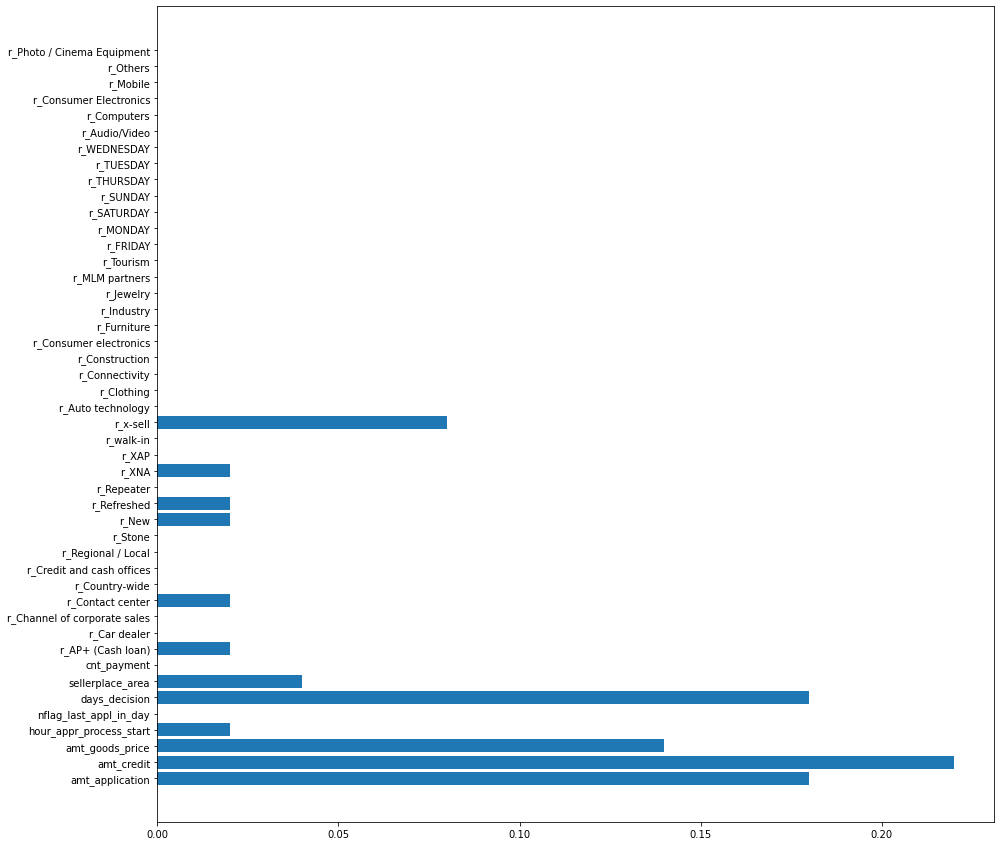

In [50]:
adaboost.feature_importances_
plt.figure(figsize=(15,15))
plt.barh(X.columns, adaboost.feature_importances_);

In [ ]:
# metrics.precision_score(y_val,y_pred) , metrics.recall_score(y_val,y_pred) , metrics.f1_score(y_val,y_pred)

In [ ]:
# xg.feature_importances_
# plt.figure(figsize=(15,15))
# plt.barh(X.columns, xg.feature_importances_);

### INSTALLMENT LOANS

In [52]:
ipdf=pdf[pdf.name_contract_type!='Revolving loans'].copy()
ipdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180119 entries, 0 to 1670213
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   sk_id_prev                  1180119 non-null  int64  
 1   sk_id_curr                  1180118 non-null  float64
 2   name_contract_type          1180119 non-null  object 
 3   amt_annuity                 1142040 non-null  float64
 4   amt_application             1180119 non-null  float64
 5   amt_credit                  1180119 non-null  float64
 6   amt_down_payment            1180119 non-null  float64
 7   amt_goods_price             1154650 non-null  float64
 8   weekday_appr_process_start  1180119 non-null  object 
 9   hour_appr_process_start     1180119 non-null  int64  
 10  nflag_last_appl_in_day      1180119 non-null  int64  
 11  rate_down_payment           1180119 non-null  float64
 12  rate_interest_primary       5951 non-null     float64
 1

In [53]:
ipdf.name_contract_status.value_counts(),ipdf.name_contract_status.value_counts(normalize=True)*100

(Approved    939010
 Refused     241109
 Name: name_contract_status, dtype: int64,
 Approved    79.569094
 Refused     20.430906
 Name: name_contract_status, dtype: float64)

In [54]:
# Looking for missing values
na_variables = [ var for var in ipdf.columns if ipdf[var].isnull().mean() > 0 ]
na_variables

['sk_id_curr',
 'amt_annuity',
 'amt_goods_price',
 'rate_interest_primary',
 'rate_interest_privileged',
 'cnt_payment',
 'days_first_drawing',
 'days_first_due',
 'days_last_due_1st_version',
 'days_last_due',
 'days_termination']

In [55]:
data_na = (ipdf[na_variables].isnull().mean())*100
data_na.sort_values()

sk_id_curr                    0.000085
amt_goods_price               2.158172
cnt_payment                   3.226370
amt_annuity                   3.226708
days_last_due_1st_version    23.458143
days_first_due               24.073420
days_last_due                35.437104
days_termination             35.742582
rate_interest_primary        99.495729
rate_interest_privileged     99.495729
days_first_drawing           99.999576
dtype: float64

In [56]:
with pd.option_context("display.max_columns", None):
    display(ipdf.loc[ipdf['sk_id_curr'].isna()])

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
643610,2513618,NaN,Consumer loans,7109.1,62950.5,59292.0,9000.0,62950.5,TUESDAY,16,1,0.143528,NaN,NaN,XAP,Approved,-2032,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Stone,57,Connectivity,12.0,high,POS mobile with interest,NaN,-1994.0,-1664.0,-1664.0,-1656.0,No


In [57]:
ipdf = ipdf.dropna(subset = ['sk_id_curr'])

In [58]:
ipdfwithinterest = ipdf.loc[ipdf['rate_interest_primary'].notna()]

In [59]:
# droping columns with more than 99% missing values
ipdf.drop(columns = ['rate_interest_primary','rate_interest_privileged','days_first_drawing'],inplace = True)

In [60]:
ipdf.drop(columns=['days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval',
                  'days_decision','code_reject_reason'],inplace=True)

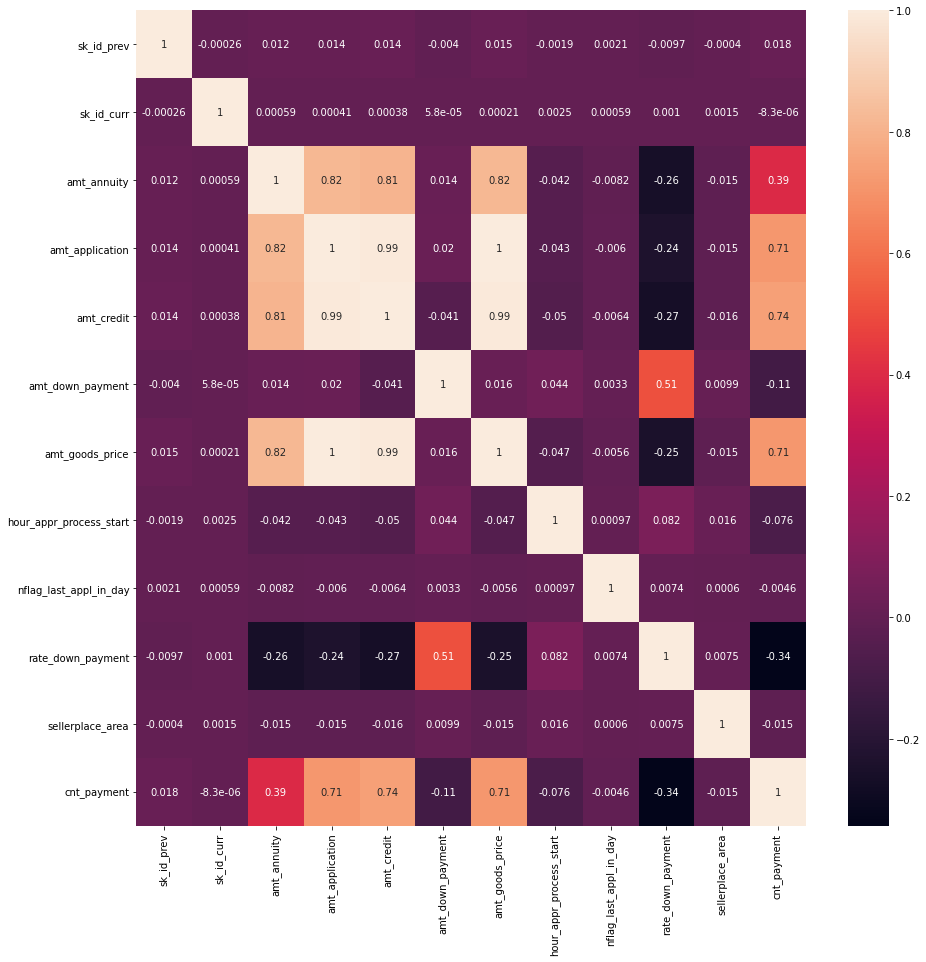

In [61]:
# correlation heatmap
plt.figure(figsize = (15,15))
sn.heatmap(ipdf.corr() , annot = True);

In [62]:
na_variables = [ var for var in ipdf.columns if ipdf[var].isnull().mean() > 0 ]
data_na = (ipdf[na_variables].isnull().mean())*100
data_na.sort_values(ascending=False)

amt_annuity        3.226711
cnt_payment        3.226372
amt_goods_price    2.158174
dtype: float64

In [63]:
ipdf.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,...,Repeater,XAP,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,...,Repeater,XAP,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,...,Repeater,XAP,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,...,Repeater,XAP,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [64]:
ipdf.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'nflag_last_appl_in_day', 'rate_down_payment', 'name_cash_loan_purpose',
       'name_contract_status', 'name_payment_type', 'name_type_suite',
       'name_client_type', 'name_goods_category', 'name_portfolio',
       'name_product_type', 'channel_type', 'sellerplace_area',
       'name_seller_industry', 'cnt_payment', 'name_yield_group',
       'product_combination'],
      dtype='object')

In [65]:
# correlation is 1 between them
ipdf['amt_goods_price'].fillna(ipdf['amt_application'],inplace = True)

In [66]:
na_variables = [ var for var in ipdf.columns if ipdf[var].isnull().mean() > 0 ]
data_na = (ipdf[na_variables].isnull().mean())*100
data_na.sort_values(ascending=False)

amt_annuity    3.226711
cnt_payment    3.226372
dtype: float64

In [67]:
ipdf.loc[ipdf['cnt_payment'].isna()].name_contract_status.value_counts()

Refused     38071
Approved        4
Name: name_contract_status, dtype: int64

In [68]:
ipdf.loc[ipdf['amt_annuity'].notna()].name_contract_status.value_counts() , ipdf.name_contract_status.value_counts()

(Approved    939001
 Refused     203038
 Name: name_contract_status, dtype: int64,
 Approved    939009
 Refused     241109
 Name: name_contract_status, dtype: int64)

In [69]:
ipdf.drop(columns=['amt_credit','cnt_payment','amt_annuity'],inplace=True)

In [70]:
ipdf.isna().sum().sum()

0

In [71]:
num=list(ipdf._get_numeric_data().columns)
print("Numerical Variables:   ",len(num))

ct=set(ipdf.columns)-set(num)
print("Categorical Variables: ",len(ct))

Numerical Variables:    9
Categorical Variables:  14


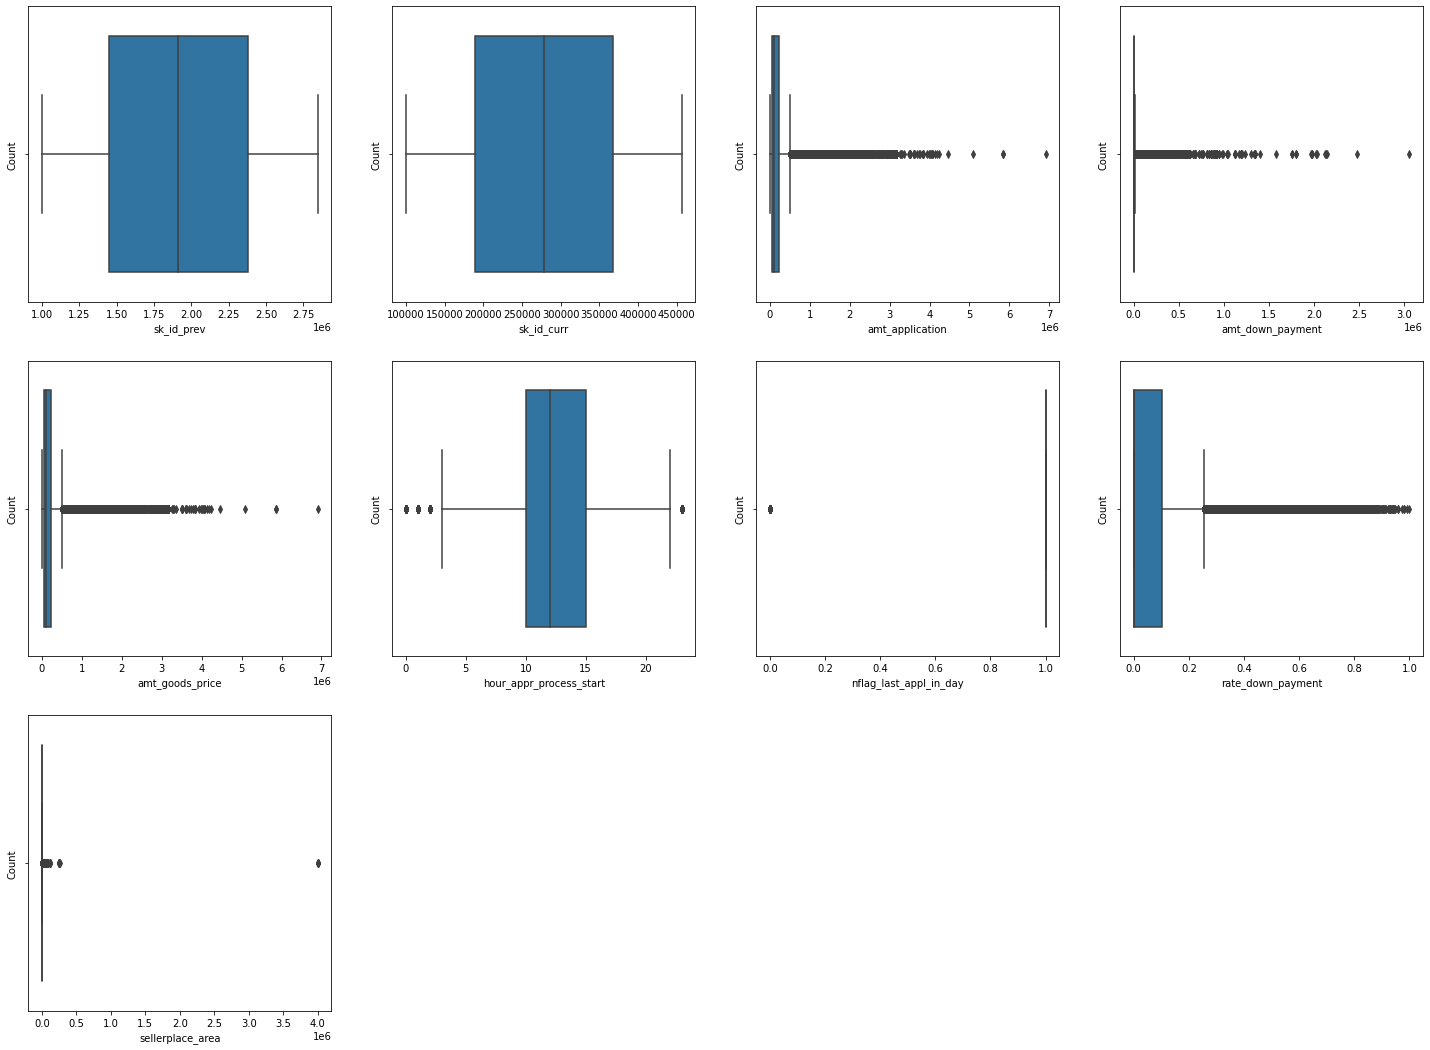

In [72]:
plt.figure(figsize=(25,25))
for i,var in enumerate(num):
    plt.subplot(4,4,i+1)
    sn.boxplot(x=ipdf[var],data=ipdf)
    plt.xlabel(var)
    plt.ylabel("Count")

In [73]:
ipdf['target']=[1 if x =='Approved' else 0 for x in ipdf.name_contract_status]
ipdf.drop(columns = ['name_contract_status'],inplace = True)

In [74]:
ipdf['target'].value_counts(), ipdf['target'].value_counts(normalize = True)*100

(1    939009
 0    241109
 Name: target, dtype: int64,
 1    79.569077
 0    20.430923
 Name: target, dtype: float64)

In [75]:
ipdf.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_application',
       'amt_down_payment', 'amt_goods_price', 'weekday_appr_process_start',
       'hour_appr_process_start', 'nflag_last_appl_in_day',
       'rate_down_payment', 'name_cash_loan_purpose', 'name_payment_type',
       'name_type_suite', 'name_client_type', 'name_goods_category',
       'name_portfolio', 'name_product_type', 'channel_type',
       'sellerplace_area', 'name_seller_industry', 'name_yield_group',
       'product_combination', 'target'],
      dtype='object')

In [76]:
ipdf.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_application,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,name_yield_group,product_combination,target
0,2030495,271877.0,Consumer loans,17145.0,0.0,17145.0,SATURDAY,15,1,0.0,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest,1
1,2802425,108129.0,Cash loans,607500.0,0.0,607500.0,THURSDAY,11,1,0.0,...,Repeater,XAP,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,1
2,2523466,122040.0,Cash loans,112500.0,0.0,112500.0,TUESDAY,11,1,0.0,...,Repeater,XAP,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,1
3,2819243,176158.0,Cash loans,450000.0,0.0,450000.0,MONDAY,7,1,0.0,...,Repeater,XAP,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,1
4,1784265,202054.0,Cash loans,337500.0,0.0,337500.0,THURSDAY,9,1,0.0,...,Repeater,XAP,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,0


In [77]:
ipdf.shape

(1180118, 23)

In [78]:
# dropping insignificant variables
ipdf.drop(columns = ['sk_id_curr','weekday_appr_process_start'], inplace = True)

In [79]:
num=list(ipdf._get_numeric_data().columns)
print("Numerical Variables:   ",len(num))

ct=set(ipdf.columns)-set(num)
print("Categorical Variables: ",len(ct))

Numerical Variables:    9
Categorical Variables:  12


In [80]:
num,ct

(['sk_id_prev',
  'amt_application',
  'amt_down_payment',
  'amt_goods_price',
  'hour_appr_process_start',
  'nflag_last_appl_in_day',
  'rate_down_payment',
  'sellerplace_area',
  'target'],
 {'channel_type',
  'name_cash_loan_purpose',
  'name_client_type',
  'name_contract_type',
  'name_goods_category',
  'name_payment_type',
  'name_portfolio',
  'name_product_type',
  'name_seller_industry',
  'name_type_suite',
  'name_yield_group',
  'product_combination'})

In [81]:
ipdf.name_type_suite.replace('Other_A',value='other',inplace=True)
ipdf.name_type_suite.replace('Other_B',value='other',inplace=True)

ipdf['t_children']=ipdf.name_type_suite=='Children'
ipdf['t_family']=ipdf.name_type_suite=='Family'
ipdf['t_group']=ipdf.name_type_suite=='Group of people'
ipdf['t_unaccompanied']=ipdf.name_type_suite=='Unaccompanied'
ipdf['t_spose']=ipdf.name_type_suite=='Spouse, partner'
ipdf['t_other']=ipdf.name_type_suite=='other'

In [82]:
ipdf.columns

Index(['sk_id_prev', 'name_contract_type', 'amt_application',
       'amt_down_payment', 'amt_goods_price', 'hour_appr_process_start',
       'nflag_last_appl_in_day', 'rate_down_payment', 'name_cash_loan_purpose',
       'name_payment_type', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'name_yield_group', 'product_combination', 'target', 't_children',
       't_family', 't_group', 't_unaccompanied', 't_spose', 't_other'],
      dtype='object')

In [83]:
# Encoding Categorical Variables
finalipdf = pd.get_dummies(ipdf , columns = ['channel_type','name_client_type','name_contract_type',
                                             'name_payment_type','name_product_type',
                                             'name_seller_industry','name_yield_group',
                                             'product_combination'], prefix="d")

finalipdf = pd.get_dummies(finalipdf , columns = ['name_cash_loan_purpose',
   'name_goods_category','name_portfolio'], prefix="d")


In [84]:
finalipdf.drop(columns=['name_type_suite','amt_goods_price','sk_id_prev'],inplace = True)

In [85]:
finalipdf.shape

(1180118, 114)

In [86]:
finalipdf.columns

Index(['amt_application', 'amt_down_payment', 'hour_appr_process_start',
       'nflag_last_appl_in_day', 'rate_down_payment', 'sellerplace_area',
       'target', 't_children', 't_family', 't_group',
       ...
       'd_Others', 'd_Photo / Cinema Equipment', 'd_Sports and Fitness',
       'd_Tourism', 'd_XAP', 'd_XNA', 'd_Cars', 'd_Cash', 'd_POS', 'd_XNA'],
      dtype='object', length=114)

### Model Building for Installment Loans

In [87]:
X, y = finalipdf.drop('target',axis=1),finalipdf['target']

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,stratify=y,random_state=42)

rf=RandomForestClassifier()

adaboost=AdaBoostClassifier()

#### Random Forest

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
y = rf.predict(X_train)
y_pred = rf.predict(X_val)

In [91]:
from sklearn import metrics

# print("Train Data Accuracy:",metrics.accuracy_score(y_train, y))
print("Test Data Accuracy:",metrics.accuracy_score(y_val, y_pred))

Test Data Accuracy: 0.8624970341999119


In [92]:
metrics.precision_score(y_val,y_pred) , metrics.recall_score(y_val,y_pred) , metrics.f1_score(y_val,y_pred)

(0.88351849108774, 0.9528066793750866, 0.9168553948946025)

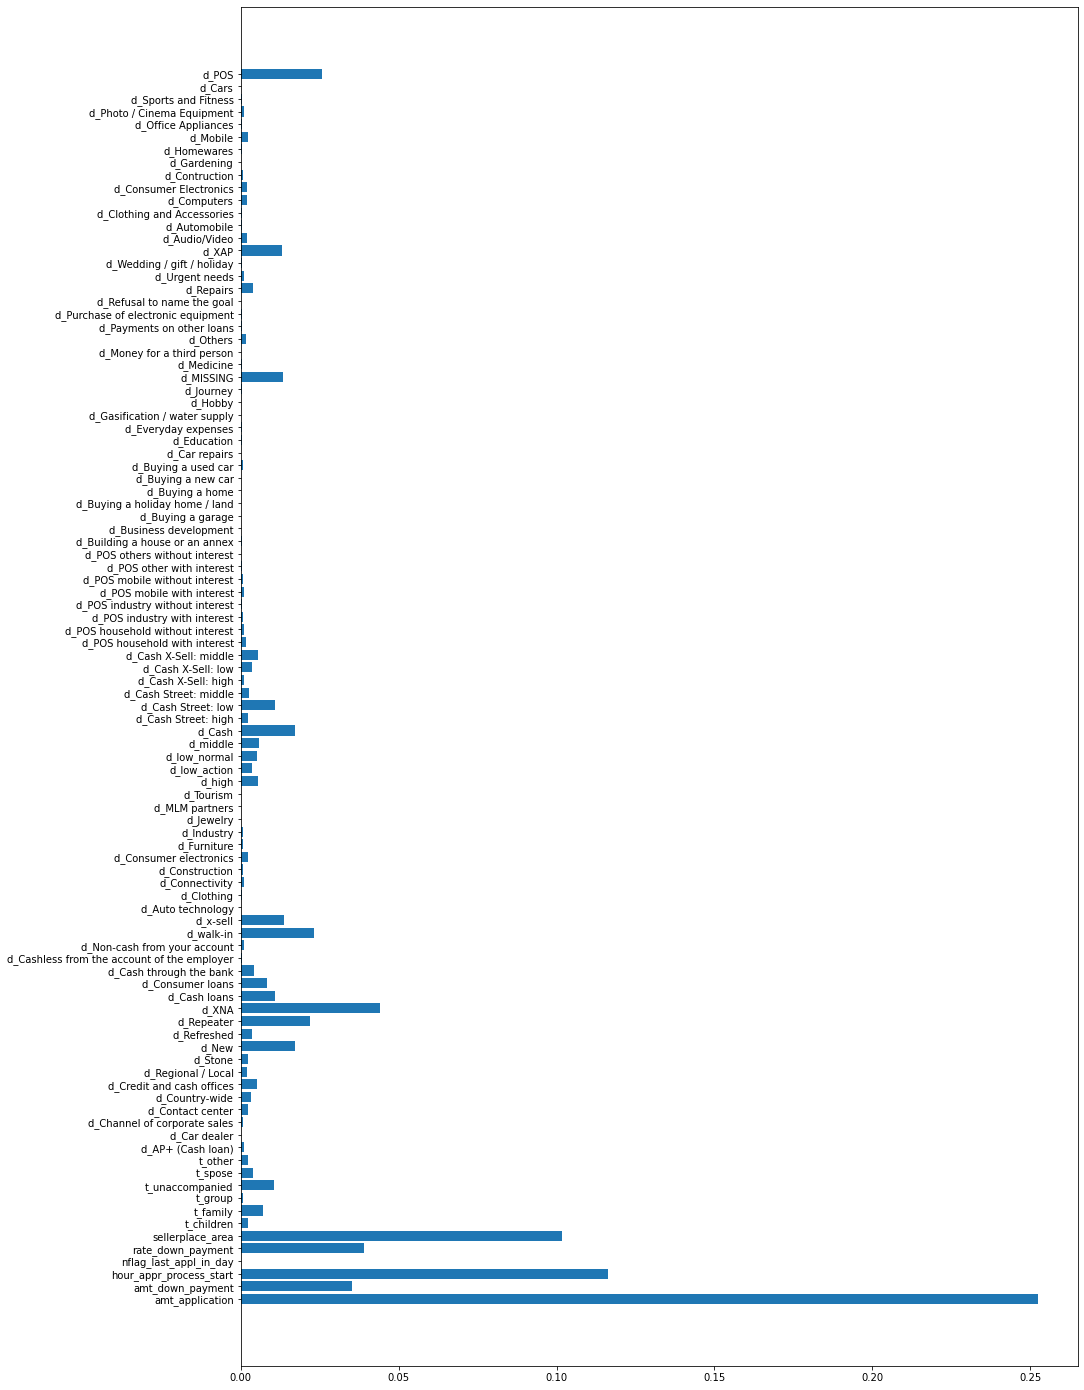

In [93]:
rf.feature_importances_
plt.figure(figsize=(15,25))
plt.barh(X.columns, rf.feature_importances_);

#### Adaboost

In [94]:
adaboost.fit(X_train,y_train)
# y = rf.predict(X_train)
y_pred = adaboost.predict(X_val)
metrics.accuracy_score(y_val, y_pred) 

0.8565018811646273

In [95]:
metrics.precision_score(y_val,y_pred) , metrics.recall_score(y_val,y_pred) , metrics.f1_score(y_val,y_pred)

(0.8629142913725546, 0.9744624657884368, 0.9153023024349745)

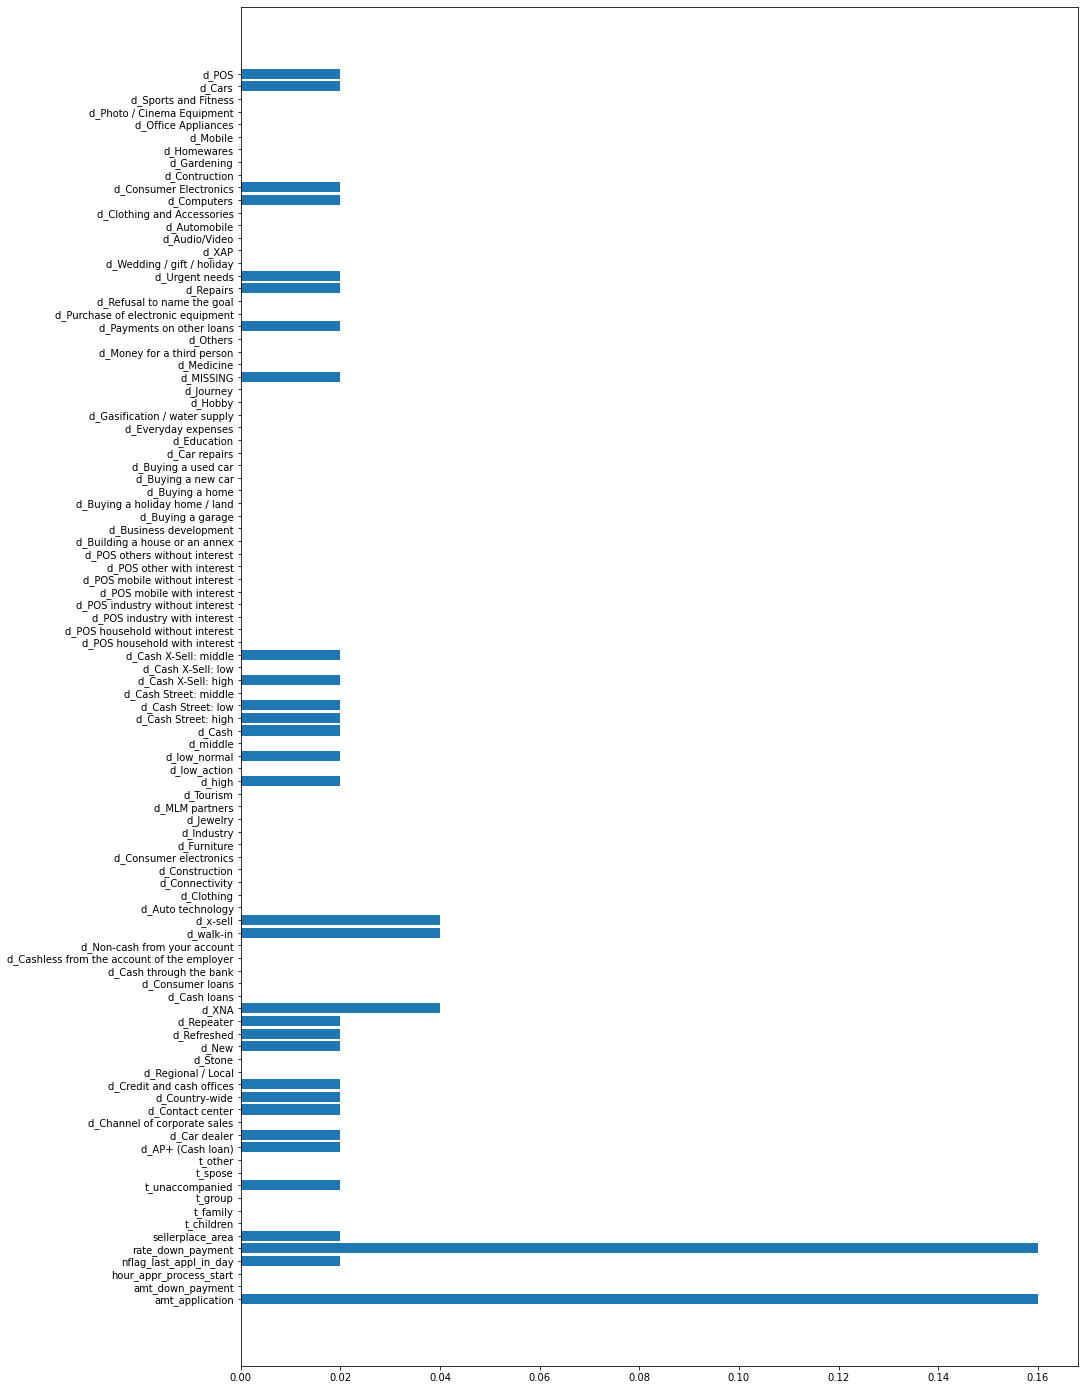

In [96]:
adaboost.feature_importances_
plt.figure(figsize=(15,25))
plt.barh(X.columns, adaboost.feature_importances_);